# Estadística 

# uso del módulo stats 
#### de la biblioteca Scipy

https://docs.scipy.org/doc/scipy/reference/stats.html

In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('churnTEL.csv')
df.head()
# cambia la dirección 'churnTEL.csv' a la tuya

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# tamano del dataset
tamano  = df.shape
tamano

(3333, 21)

In [4]:
# nombre de las variables
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [5]:
# numero de registros
tamano[0]

3333

In [6]:
# tipo de variables 
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [7]:
## cual es la proporción de usuarios que se retiraron 
df['churn'].mean()

0.14491449144914492

In [8]:
# ¿Cuáles son los valores promedio de las variables para esos usuarios?
df[df['churn'] == 1].mean()

account length            102.664596
area code                 437.817805
number vmail messages       5.115942
total day minutes         206.914079
total day calls           101.335404
total day charge           35.175921
total eve minutes         212.410145
total eve calls           100.561077
total eve charge           18.054969
total night minutes       205.231677
total night calls         100.399586
total night charge          9.235528
total intl minutes         10.700000
total intl calls            4.163561
total intl charge           2.889545
customer service calls      2.229814
churn                       1.000000
dtype: float64

# Cauntos usuarios leales hay (churn ==0)

# análisis de la variable   "total day minutes"

In [9]:
x = df['total day minutes']

# Medidas de tendencia central

1. media

2. mediana

3. moda


# Medidas de dispersión  

1. desviación estándar de la población

2. varianza de la población 

3. desviación estándar de la muestra

3. varianza de la muestra

#### Ejemplo 

In [10]:
from scipy import stats

In [11]:
# media aritmetica
x.mean()

179.77509750975116

In [12]:
# mediana
x.median()

179.4

In [13]:
# desviacion estandar
x.std()

54.46738920237142

In [14]:
# varianza
x.var()

2966.696486522607

#### moda

In [15]:
stats.mode(x)                     #el segundo array devuelve la frecuencia

ModeResult(mode=array([154.]), count=array([8]))

In [16]:
#### asimetria (skewness) (sesgo)   3 momento central
# sesgo positivo: sesgada a la derecha
# sesgo negativo: sesgada a la izquierda
# sesgo cero: curva simetrica o normal 

stats.skew(x)

-0.029063979518119797

In [17]:
#### kurtosis                     4 momento central dividido por la varianza al cuadrado. La kurtosis de la normal es 3
# curtosis positiva: Leptocurtica 
# curtosis negativa: platicurtica 
# curtosis cero: mesocurtica 
stats.kurtosis(x)           # el resultado es cero para un normal 

-0.021710117924088834

## Resumen de estadísticas 

In [18]:
x.describe()

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: total day minutes, dtype: float64

In [19]:
stats.describe(x)     #varianza insesgada

DescribeResult(nobs=3333, minmax=(0.0, 350.8), mean=179.77509750975094, variance=2966.696486522602, skewness=-0.029063979518119797, kurtosis=-0.021710117924088834)

# parámetros de localizacion 

### Cuartiles y diagramas de cajas 

Los cuartiles son los tres valores de la variable estadística que dividen a un conjunto de datos ordenados en cuatro partes iguales. Q1, Q2 y Q3 determinan los valores correspondientes al 25%, al 50% y al 75% de los datos

Los diagramas de cajas son una presentación visual que describe varias características importantes al mismo tiempo, tales como la dispersión y simetría. Para su realización se representan los tres cuartiles y los valores mínimo y máximo de los datos, sobre un rectángulo, alineado horizontal o verticalmente.

In [20]:
import matplotlib.pyplot as plt

In [21]:
# Graficos embebidos.
%matplotlib inline 

In [22]:
y = df['total night minutes']
datos_graf = [x, y]

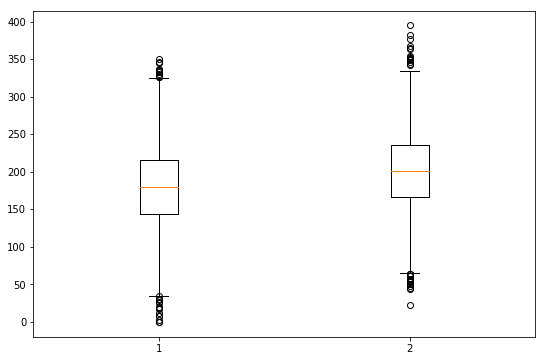

In [23]:
# Creando el objeto figura
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico
ax = fig.add_subplot(111)

# creando el grafico de cajas
bp = ax.boxplot(datos_graf)

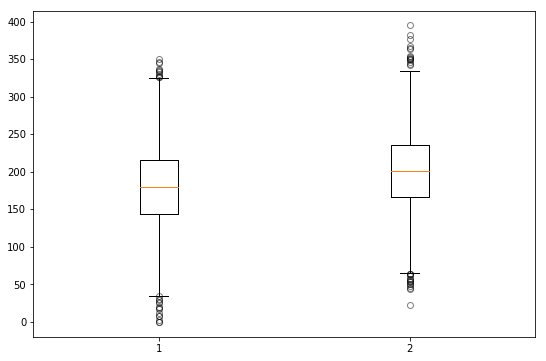

In [24]:

# Creando el objeto figura
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico
ax = fig.add_subplot(111)

# creando el grafico de cajas
bp = ax.boxplot(datos_graf)

# visualizar mas facile los atípicos
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)
# los puntos aislados son valores atípicos

In [25]:
import seaborn as sns # importando seaborn

In [26]:
import seaborn as sns
sns.set(style="whitegrid")
tips = x #datos_graf #sns.load_dataset("tips")
ax = sns.boxplot(dff)#x=tips["total_bill"])

NameError: name 'dff' is not defined

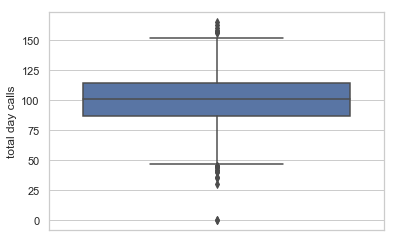

In [27]:
# para cualquier columna se puede hacer el boxplot
sns.boxplot( y=df["total day calls"] )

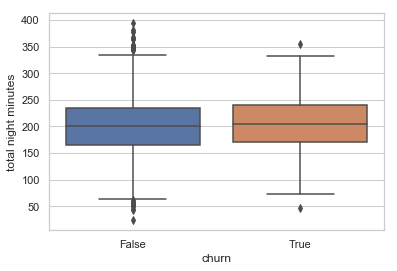

In [28]:
# si una misma varibale tiene varias categorias 
sns.boxplot( x=df["churn"], y = df["total night minutes"]) 

# Reto

#### investigar si hay diferencia significativa en el uso del celular que permita concluir que una persona va a abandonar la compañía de celular. 

#### Cálculo de Percentiles

In [29]:
stats.percentileofscore([1, 2, 3, 4], 3)

75.0

In [30]:
# solo 2/5 de los valores son menores estrictamente que 3
stats.percentileofscore([1, 2, 3, 3, 4], 3, kind='strict')

40.0

In [31]:
#### RECIPROVAMENTE 
stats.scoreatpercentile([1, 2, 3, 3, 4], 50)

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


3.0

#### Frecuencia acumulada 

In [ ]:
 xx = [1, 4, 2, 1, 3, 1]
res = stats.cumfreq(x, numbins=4, defaultreallimits=(1.5, 5))
res

In [ ]:
x = df['total day minutes']
res = stats.cumfreq(x, numbins=40 )#, defaultreallimits=(1.5, 5)) # numbins = 20, 25 


In [ ]:
res.cumcount

#### grafiquemos el histograma 

In [ ]:
# calular el espacio de valores de x
valoresde_x = res.lowerlimit + np.linspace(0, res.binsize*res.cumcount.size, res.cumcount.size)

In [ ]:
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.hist(x, bins=25)
ax1.set_title('Histograma')
ax2.bar(valoresde_x, res.cumcount, width=res.binsize)
ax2.set_title('Histograma acumulado')
ax2.set_xlim([valoresde_x.min(), valoresde_x.max()])

### Conviertiendo en frecuencia relativa 

In [ ]:
Rres = stats.relfreq(x, numbins=4)
Rres     

In [ ]:
np.sum(Rres.frequency)  # relative frequencies should add up to 1

In [ ]:
Rres = stats.relfreq(x, numbins=25)
exjeX = Rres.lowerlimit + np.linspace(0, Rres.binsize * Rres.frequency.size, Rres.frequency.size)

In [ ]:
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1, 1, 1)
ax.bar(exjeX, Rres.frequency, width = Rres.binsize)
ax.set_title('Frecuencia relativa (histograma)')
ax.set_xlim([exjeX.min(), exjeX.max()])

plt.show()

# Grafica de la normal 

https://relopezbriega.github.io/blog/2015/06/27/probabilidad-y-estadistica-con-python/

In [ ]:
import matplotlib.pyplot as plt # importando matplotlib
import seaborn as sns # importando seaborn

# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

In [ ]:
mu, sigma = 0, 0.1 # media y desvio estandar
s = np.random.normal(mu, sigma, 1000) #creando muestra de datos

In [ ]:
# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(s, 30, normed=True)
normal = plt.plot(cajas, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (cajas - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')

In [ ]:
# GENERANDO NUMEROS ALEATORIOS 
import numpy as np # importando numpy
from scipy import stats # importando scipy.stats
import pandas as pd # importando pandas

np.random.seed(2131982) # para poder replicar el random

In [ ]:
datos = np.random.randn(5, 4) # datos normalmente distribuidos
datos

#### este método asigna una distribucion a una variable :

In [ ]:
rv1 = stats.norm() # Normal estándar

In [ ]:
rv1.cdf(0.5)       # Evaluamos la función de distribución en 0.5

In [ ]:
xx = np.linspace(0.0, 1.0)
rv1.pdf(xx)  # Densidad de probabilidad en el intervalo [0.0, 1.0]

In [ ]:
rv2 = stats.norm(2.0, 0.0)  # Normal (2.0, 0.0)
rv3 = stats.norm(loc=-1.0, scale=np.sqrt(0.5))  # Media -1.0 y varianza 0.5
stats.norm.pdf(xx, -1.0, np.sqrt(0.5))  # Densidad de una normal (-1.0, 0.5) en [0.0, 1.0]

In [ ]:
xx = np.linspace(-3.0, 3.0)
plt.plot(xx, stats.norm.pdf(xx, -1.0, np.sqrt(0.5)))

# probabilidad 

In [ ]:
1 manejo de distribuciones

2 representación gráfica con matplotlib

# aplicacion: análisis exploratorio 

#### pandas

https://www.codigofuente.org/analisis-exploratorio-python-pandas/

In [ ]:
from scipy.stats import norm
mean, var, skew, kurt = norm.stats(moments='mvsk')

In [ ]:
norm.stats(moments='mvsk')

# tarea 

#### ENCUENTRE el área balo la curva de la función de densidad de probabilidad normal que se encuentra entre x = -2 y x = 2

In [ ]:
rv1.cdf(2) - rv1.cdf(-2)  # dos desviaciones 

In [ ]:
rv1.cdf(3) - rv1.cdf(-3)  # tres desviaciones 

# Análisis Multivariante 

In [ ]:
#### Retomemos los datos originales 
df.head()

Recuerde que cada fila corresponde a un cliente

In [ ]:
# la dimensionalidad de los datos
print(df.shape)

In [ ]:
# los nombre de las columnas 
print(df.columns)

In [ ]:
# informacion general sobre los datos 
print(df.info())

bool, int64, float64 y object son los tipos de datos de 

### Se puede cambiar el tipo de columna con el método astype. Apliquemos este método a la función Churn para convertirlo en int64:

In [ ]:
df['churn'] = df['churn'].astype('int64')

In [ ]:
df.describe()

### Para ver estadísticas sobre características no numéricas, se tiene que indicar explícitamente los tipos de datos de interés en el parámetro de inclusión.

In [ ]:
df.describe(include=['object', 'bool'])

## Ordenar los datos

In [ ]:
df.sort_values(by='total day charge', ascending=False).head()

In [ ]:
df.sort_values(by=['churn', 'total day charge'], ascending=[True, False]).head()

### Los dataframes se pueden indexar por nombre de columna (etiqueta) o por nombre de fila (índice) o por el número de serie de una fila. El método loc se usa para indexar por nombre, mientras que iloc () se usa para indexar por número.

In [ ]:
df.loc[0:5, 'state':'area code']


In [ ]:
df.iloc[0:5, 0:3]

# matriz de covarianzas 


In [ ]:
df.cov()

In [ ]:
df.corr()